# <center>Demystifying Convolutional and Pooling Layer in CNN</center>

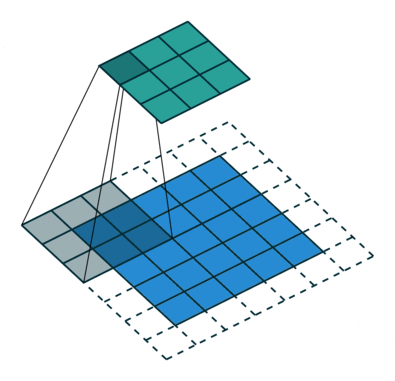

### <center>Overview</center>
## Convolutional Layer
1. Padding
2. Stride

## Pooling Layer
3. Pooling Layer

In [1]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
(X_train, y_train),(y_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# 1. Padding

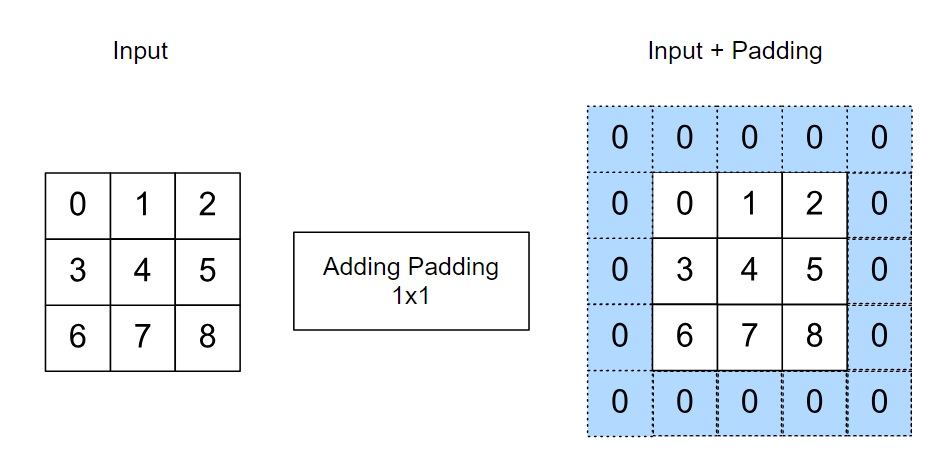

#### Paddings are used:
###### <center> I. Preserve initial dimension</center>
###### <center> II. Preserve information loss from side layers</center>

In [3]:
'''
padding=valid (no padding used)
'''
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1982592   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,002,698
Trainable params: 2,002,698
Non-

In [5]:
'''
padding=same (size of feature map = size of image )
'''
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,231,498
Trainable params: 3,231,498
No

# 2. Stride

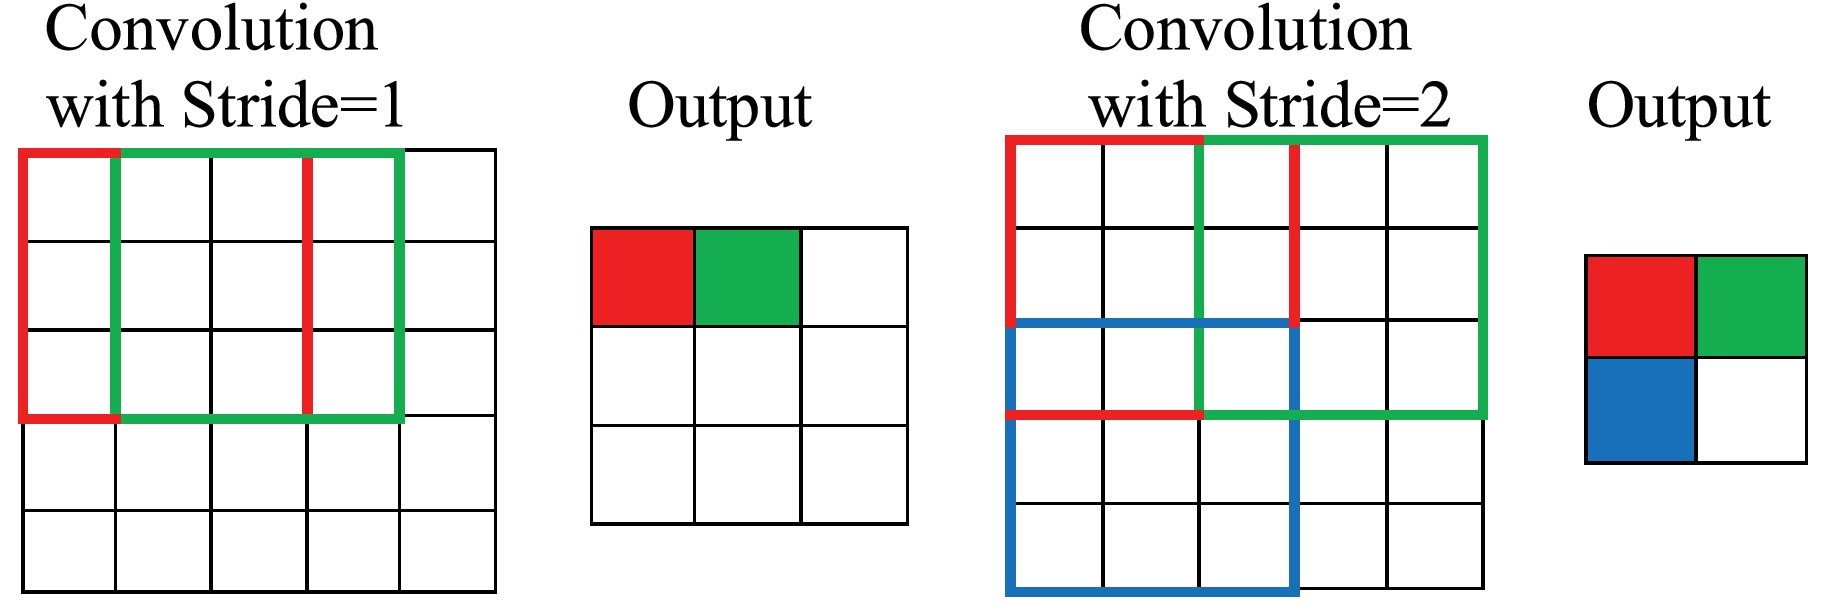

#### Strides are used for:
##### <center>I. Reducing dimensions</center>
##### <center>II. Memory efficiency</center>

In [7]:
'''
stride
'''
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2),activation='relu'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 85,770
Trainable params: 85,770
Non-trai

# 3. Pooling Layer

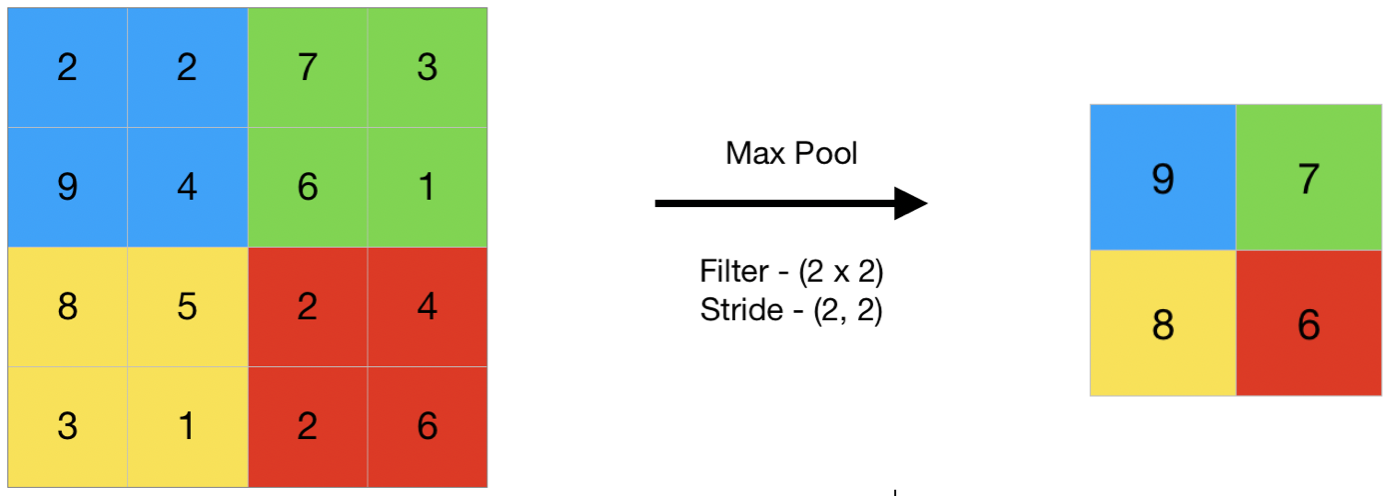

#### Pooling is used for:
##### <center> I. Reducing Size</center>
##### <center> II. Translation invariance</center>

In [9]:
'''
Pooling Layer
'''
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)        